In [62]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math as mt
import datetime
from datetime import datetime, timedelta, time
import statistics
import seaborn as sns

from mpl_toolkits.mplot3d import axes3d

import os

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [50]:
#if movies are in lots of different folders
file_list=[]
folderpath='/Users/secchim/Downloads/CellProfiler/TilescanKuO/IL1R'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('DP.csv'):
            # file_list.append(os.path.join(root,file))
            data=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(data)

dataDP=pd.concat(file_list, axis =0, ignore_index=True)
dataDP['Hoxb5_status']='DP'
print(dataDP)

file_list=[]
folderpath='/Users/secchim/Downloads/CellProfiler/TilescanKuO/IL1R'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('SP.csv'):
            # file_list.append(os.path.join(root,file))
            data=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(data)

dataSP=pd.concat(file_list, axis =0, ignore_index=True)
dataSP['Hoxb5_status']='SP'

     ImageNumber ObjectNumber  Metadata_Chnumber  Metadata_FileLocation  \
0              3            1                NaN                    NaN   
1              3            2                NaN                    NaN   
2              3            3                NaN                    NaN   
3              3            4                NaN                    NaN   
4             11            1                NaN                    NaN   
...          ...          ...                ...                    ...   
1247          17          285                NaN                    NaN   
1248          17          286                NaN                    NaN   
1249          17          287                NaN                    NaN   
1250          17          288                NaN                    NaN   
1251          17          289                NaN                    NaN   

     Metadata_Frame Metadata_Series  \
0                 0               0   
1                 0  

In [51]:
data=pd.concat([dataSP, dataDP], axis=0, ignore_index=True)
print(data)

     ImageNumber ObjectNumber  Metadata_Chnumber  Metadata_FileLocation  \
0              3            1                NaN                    NaN   
1              3            2                NaN                    NaN   
2              3            3                NaN                    NaN   
3              3            4                NaN                    NaN   
4              3            5                NaN                    NaN   
...          ...          ...                ...                    ...   
5083          17          285                NaN                    NaN   
5084          17          286                NaN                    NaN   
5085          17          287                NaN                    NaN   
5086          17          288                NaN                    NaN   
5087          17          289                NaN                    NaN   

     Metadata_Frame Metadata_Series  \
0                 0               0   
1                 0  

In [3]:
data=pd.read_csv('/Users/secchim/Downloads/CellProfiler/TilescanKuO/IL1R/lepr_tilescan.csv')

#### ADD TREATMENT COLUMN

data['treatment']='x'
######
grouped=data.groupby(['Metadata_VWF'])
dflist=[]
for i, newdf in grouped:
 #if old in the name
    if newdf['Metadata_VWF'].str.contains('old').any():
        # print(newdf['Metadata_VWF'])
        newdf['treatment']='old'
#if young in the name
    elif newdf['Metadata_VWF'].str.contains('young').any():
        newdf['treatment']='young'
    dflist.append(newdf)
data=pd.concat(dflist)   

print(data['treatment'])



0        old
1        old
2        old
3        old
4        old
       ...  
979    young
980    young
981    young
982    young
983    young
Name: treatment, Length: 984, dtype: object


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_7937/2931121013.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


/opt/anaconda3/envs/3Dtrackplot/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='treatment', ylabel='Intensity_MinIntensity_DistanceTransformLepRIL1R'>

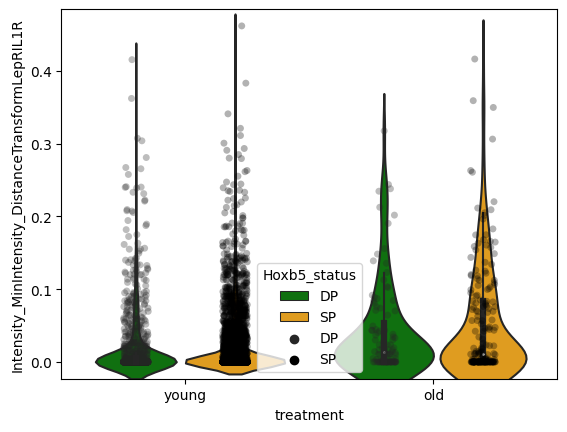

In [53]:
####plot distance to LEPR IL1R
dx=data[['treatment', 'Hoxb5_status', 'Intensity_MinIntensity_DistanceTransformLepRIL1R', 'Intensity_MinIntensity_DistanceTransformLepR']]
dx=dx.drop_duplicates()
sns.violinplot(x=("treatment"), hue='Hoxb5_status', y="Intensity_MinIntensity_DistanceTransformLepRIL1R", data=dx, showfliers = False, palette=['green','orange'], hue_order=('DP','SP'), order=('young','old'))
sns.stripplot(x=("treatment"),hue='Hoxb5_status', y="Intensity_MinIntensity_DistanceTransformLepRIL1R", data=dx, dodge=True, color='black', alpha=0.3, hue_order=('DP','SP'), order=('young','old'))


<AxesSubplot: xlabel='AreaShape_Volume', ylabel='Count'>

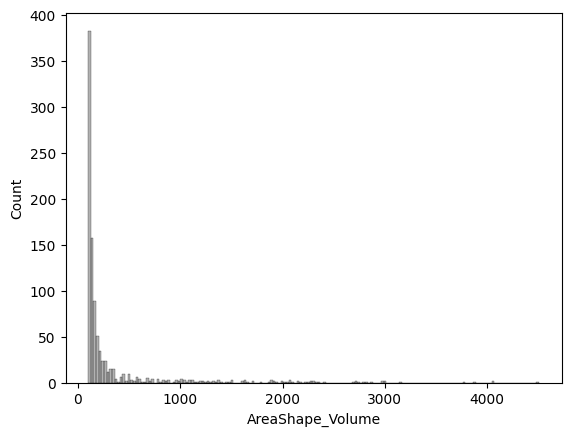

In [10]:
# sns.stripplot(x=("treatment"),hue='Hoxb5_status', y="AreaShape_Volume", data=data, dodge=True, color='black', alpha=0.3, hue_order=('DP','SP'), order=('young','old'))
sns.histplot(x="AreaShape_Volume", data=data,  color='black', alpha=0.3)

In [49]:
model = ols('Intensity_MinIntensity_DistanceTransformLepRIL1R ~  C(Hoxb5_status) + C(treatment)', data=data).fit()
sm.stats.anova_lm(model, typ=2)
# sm.stats.multicomp.pairwise_tukeyhsd(data['Intensity_MinIntensity_DistanceTransformLepRIL1R'], data['treatment'], alpha=0.05).summary()
# sm.stats.multicomp.pairwise_tukeyhsd(data['Intensity_MinIntensity_DistanceTransformLepRIL1R'], data['Hoxb5_status'], alpha=0.05).summary()


,sum_sq,df,F,PR(>F)
C(Hoxb5_status),0.010416,1.0,3.753500,5.298382e-02
C(treatment),0.221616,1.0,79.859727,1.953484e-18
Residual,2.722336,981.0,NaN,NaN


In [48]:
data.to_csv('/Users/secchim/Downloads/lepr_tilescan.csv')

In [16]:
#USING MANUAL DISTANCES FROM CELIA 

data=pd.read_csv('/Users/secchim/Downloads/IL1R_output/Manual_Measurement_HSC_LepR_2.csv', header=0)
print(data)

                           Experience_ID  HSC_Position_X  HSC_Position_Y  \
0                        VWF_101_Young_1           91.16          110.18   
1                        VWF_101_Young_1           81.11           65.06   
2                        VWF_101_Young_1           80.54          388.36   
3                        VWF_101_Young_1           59.62          314.41   
4                        VWF_101_Young_1           27.92          491.46   
..                                   ...             ...             ...   
167  VWF_106_Platelet_Depletion_2_area_2          169.97           20.51   
168  VWF_106_Platelet_Depletion_2_area_2          122.29          121.55   
169  VWF_106_Platelet_Depletion_2_area_2          169.72           65.22   
170  VWF_106_Platelet_Depletion_2_area_2          214.69           61.76   
171  VWF_106_Platelet_Depletion_2_area_2           88.94          111.91   

     HSC_Position_Z  Z_slice           Treatment HSC_Profile  \
0             22.00    

In [31]:
####plot distance to LEPR IL1R
dx=data[['Treatment', 'HSC_Profile', 'Minimum_Distance_LepRIL1Rneg(um)', 'Minimum_Distance_LepRIL1R1pos(um)']]
dx=dx.drop_duplicates()
dx=dx[dx['Treatment']!='Old']
dx['Min_Distance_all']='x'
dx['Closest_LepR']='x'
for b, r in dx.iterrows():
    if dx.loc[b,'Minimum_Distance_LepRIL1Rneg(um)']>dx.loc[b,'Minimum_Distance_LepRIL1R1pos(um)']:
        dx.loc[b,'Min_Distance_all']=dx.loc[b,'Minimum_Distance_LepRIL1R1pos(um)']
        dx.loc[b,'Closest_LepR']='LepR1pos'
    elif dx.loc[b,'Minimum_Distance_LepRIL1Rneg(um)']<dx.loc[b,'Minimum_Distance_LepRIL1R1pos(um)']:
        dx.loc[b,'Min_Distance_all']=dx.loc[b,'Minimum_Distance_LepRIL1Rneg(um)']
        dx.loc[b,'Closest_LepR']='LepRneg'
    elif dx.loc[b,'Minimum_Distance_LepRIL1Rneg(um)']==dx.loc[b,'Minimum_Distance_LepRIL1R1pos(um)']:
        dx.loc[b,'Min_Distance_all']=dx.loc[b,'Minimum_Distance_LepRIL1Rneg(um)']
        dx.loc[b,'Closest_LepR']='equal'
print(dx)

dx['Min_Distance_all']=dx['Min_Distance_all'].astype(float)

              Treatment HSC_Profile  Minimum_Distance_LepRIL1Rneg(um)  \
0                 Young          DP                              3.55   
1                 Young          SP                              0.00   
2                 Young          SP                              1.66   
3                 Young          SP                              0.00   
4                 Young          SP                              1.10   
..                  ...         ...                               ...   
167  Platelet_Depletion          DP                              5.76   
168  Platelet_Depletion          SP                              1.56   
169  Platelet_Depletion          SP                              0.35   
170  Platelet_Depletion          DP                              9.18   
171  Platelet_Depletion          DP                              4.89   

     Minimum_Distance_LepRIL1R1pos(um) Min_Distance_all Closest_LepR  
0                                 1.00              

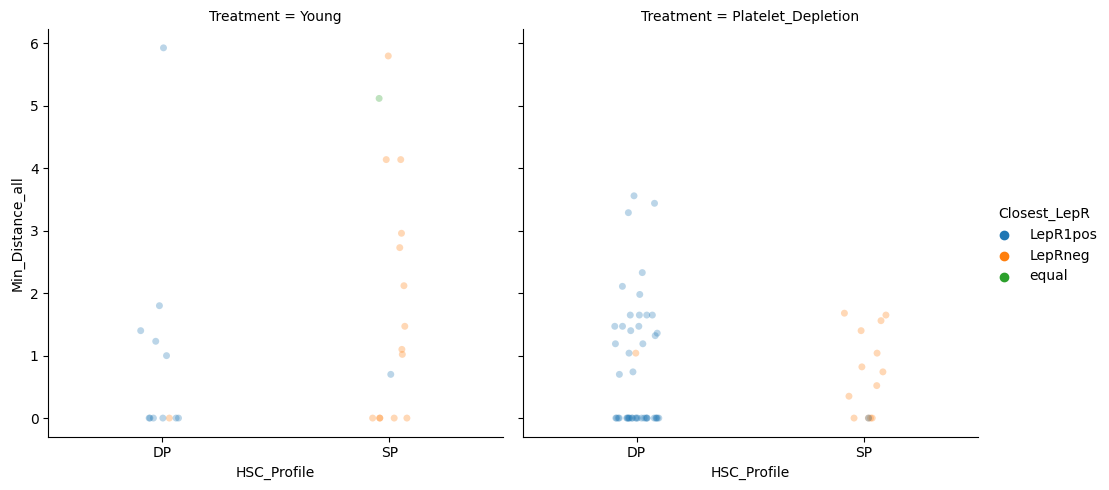

In [61]:
# dx.to_csv('/Users/secchim/Downloads/manual_lepr_tilescan.csv')
#PLOTTING DISTANCE TO ALL LEPR 
# sns.violinplot(x=("Treatment"), hue='HSC_Profile', y='Min_Distance_all', data=dx, showfliers = False, palette=['green','orange'], hue_order=('DP','SP'), order=('Young','Platelet_Depletion'))
# sns.stripplot(x=("Treatment" ),hue='Closest_LepR', y="Min_Distance_all", data=dx, dodge=False, jitter=True, alpha=0.3, order=('Young','Platelet_Depletion')) #hue_order=('DP','SP'), color='black',
sns.catplot(x=("HSC_Profile" ),hue='Closest_LepR', y="Min_Distance_all", data=dx,col="Treatment", dodge=False, jitter=True, alpha=0.3, order=('DP','SP')) 
# sns.catplot(x=("HSC_Profile" ),hue='Closest_LepR', y="Min_Distance_all", data=dx,col="Treatment", dodge=False, jitter=True, alpha=0.3, order=('DP','SP'), kind='violin', palette=['green','orange'], legend=False) #hue_order=('DP','SP'), color='black',


/opt/anaconda3/envs/3Dtrackplot/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Treatment', ylabel='Minimum_Distance_LepRIL1R1pos(um)'>

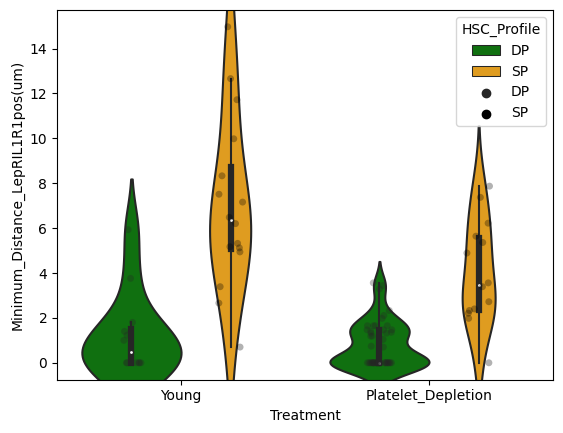

In [35]:
#PLOTTING DISTANCE TO LEPR IL1R cells
sns.violinplot(x=("Treatment"), hue='HSC_Profile', y='Minimum_Distance_LepRIL1R1pos(um)', data=dx, showfliers = False, palette=['green','orange'], hue_order=('DP','SP'), order=('Young','Platelet_Depletion'))
sns.stripplot(x=("Treatment"),hue='HSC_Profile', y="Minimum_Distance_LepRIL1R1pos(um)", data=dx, dodge=True,hue_order=('DP','SP'), color='black', alpha=0.3, order=('Young','Platelet_Depletion')) #

In [74]:
file_list=[]
folderpath='/Users/secchim/Downloads/IL1R_analysis/230712_IL1R_output'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('BM.csv'):
            # file_list.append(os.path.join(root,file))
            dataBM=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(dataBM)

dataBM=pd.concat(file_list, axis =0, ignore_index=True)
# print(dataBM)

#Filter area shape diameter over 10 (under 10 can't really be a cell in tissue)
dataBM=dataBM[dataBM['AreaShape_EquivalentDiameter']>10]
# print(dataBM) #1915 to 282 rows

grouped=dataBM.groupby(['Metadata_VWF'])
grouped #list of dataframes
dflist=[]
for i, newdf in grouped: #new df is grouped data franes
    newdf['WBM']=sum(newdf['AreaShape_Volume'])
    dflist.append(newdf)
dataBM=pd.concat(dflist)
print(dataBM['WBM'])

for b, r in dataBM.iterrows():
    if 'Young' in dataBM.loc[b,'Metadata_VWF']:
        dataBM.loc[b,'Treatment']='homeostasis'
    elif 'Old' in dataBM.loc[b,'Metadata_VWF']:
        dataBM.loc[b,'Treatment']='old'
    elif 'depleted' in dataBM.loc[b,'Metadata_VWF']:
        dataBM.loc[b,'Treatment']='platelet depletion'

print(dataBM['Treatment'])

0       231695409
1       231695409
3       231695409
4       231695409
12      231695409
          ...    
1147    392270399
1149    392270399
1152    392270399
1155    392270399
1156    392270399
Name: WBM, Length: 282, dtype: int64
0              homeostasis
1              homeostasis
3              homeostasis
4              homeostasis
12             homeostasis
               ...        
1147    platelet depletion
1149    platelet depletion
1152    platelet depletion
1155    platelet depletion
1156    platelet depletion
Name: Treatment, Length: 282, dtype: object


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_7937/3796987844.py:20: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped: #new df is grouped data franes


<AxesSubplot: xlabel='Treatment', ylabel='WBM'>

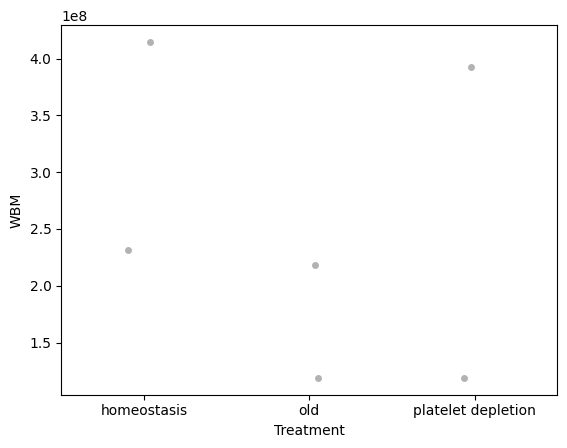

In [81]:
#Plotting bone marrow volume
dx=dataBM[['Metadata_VWF', 'WBM','Treatment']]
dx=dx.drop_duplicates()
#PLOTTING DISTANCE TO LEPR IL1R cells
# sns.violinplot(x=("Treatment"), y='WBM', data=dx, showfliers = False, legend=False)
sns.stripplot(x=("Treatment"), y="WBM", data=dx, dodge=True, color='black', alpha=0.3, legend = None) #

In [92]:
file_list=[]
folderpath='/Users/secchim/Downloads/IL1R_analysis/230712_IL1R_output'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('IL1RinLepR.csv'):
            # file_list.append(os.path.join(root,file))
            dataIiL=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(dataIiL)

dataIiL=pd.concat(file_list, axis =0, ignore_index=True)

merged_df=pd.merge(dx, dataIiL[:], on = 'Metadata_VWF')
print(merged_df)

# merged_df.to_csv('/Users/secchim/Downloads/IL1R_analysis/230712_IL1R_output/merged_df.csv')

#normalize IL1R to BM volume

grouped=merged_df.groupby(['Metadata_VWF'])
grouped #list of dataframes
dflist=[]
for i, newdf in grouped: #new df is grouped data franes
    newdf['IL1R_total']=sum(newdf['AreaShape_Volume'])
    dflist.append(newdf)
merged_df=pd.concat(dflist)
print(merged_df['IL1R_total'])

xd=merged_df[['Metadata_VWF', 'WBM', 'IL1R_total','Treatment']]
xd=xd.drop_duplicates()
xd['IL1R_norm']=xd['IL1R_total']/xd['WBM']

file_list=[]
folderpath='/Users/secchim/Downloads/IL1R_analysis/230712_IL1R_output'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('IL1RoutLepR.csv'):
            # file_list.append(os.path.join(root,file))
            dataIoL=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(dataIoL)

dataIoL=pd.concat(file_list, axis =0, ignore_index=True)

merged_Io=pd.merge(dx, dataIoL[:], on = 'Metadata_VWF')
print(merged_Io)

# merged_df.to_csv('/Users/secchim/Downloads/IL1R_analysis/230712_IL1R_output/merged_df.csv')

#normalize IL1R to BM volume

grouped=merged_Io.groupby(['Metadata_VWF'])
grouped #list of dataframes
dflist=[]
for i, newdf in grouped: #new df is grouped data franes
    newdf['IL1RO_total']=sum(newdf['AreaShape_Volume'])
    dflist.append(newdf)
merged_Io=pd.concat(dflist)
print(merged_Io['IL1RO_total'])

xdo=merged_Io[['Metadata_VWF', 'WBM', 'IL1RO_total','Treatment']]
xdo=xdo.drop_duplicates()
xdo['IL1RO_norm']=xdo['IL1RO_total']/xdo['WBM']

                                            Metadata_VWF        WBM  \
0      Analysis_VWF_106_MS230602_M10__Young_area2_til...  231695409   
1      Analysis_VWF_106_MS230602_M10__Young_area2_til...  231695409   
2      Analysis_VWF_106_MS230602_M10__Young_area2_til...  231695409   
3      Analysis_VWF_106_MS230602_M10__Young_area2_til...  231695409   
4      Analysis_VWF_106_MS230602_M10__Young_area2_til...  231695409   
...                                                  ...        ...   
59072  Analysis_VWF_106_MS230602_Platelet_depleted_1_...  392270399   
59073  Analysis_VWF_106_MS230602_Platelet_depleted_1_...  392270399   
59074  Analysis_VWF_106_MS230602_Platelet_depleted_1_...  392270399   
59075  Analysis_VWF_106_MS230602_Platelet_depleted_1_...  392270399   
59076  Analysis_VWF_106_MS230602_Platelet_depleted_1_...  392270399   

                Treatment  ImageNumber  ObjectNumber  Metadata_Chnumber  \
0             homeostasis            1             1                NaN 

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_7937/3658288817.py:22: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped: #new df is grouped data franes


                                             Metadata_VWF        WBM  \
0       Analysis_VWF_106_MS230602_M10__Young_area2_til...  231695409   
1       Analysis_VWF_106_MS230602_M10__Young_area2_til...  231695409   
2       Analysis_VWF_106_MS230602_M10__Young_area2_til...  231695409   
3       Analysis_VWF_106_MS230602_M10__Young_area2_til...  231695409   
4       Analysis_VWF_106_MS230602_M10__Young_area2_til...  231695409   
...                                                   ...        ...   
306007  Analysis_VWF_106_MS230602_Platelet_depleted_1_...  392270399   
306008  Analysis_VWF_106_MS230602_Platelet_depleted_1_...  392270399   
306009  Analysis_VWF_106_MS230602_Platelet_depleted_1_...  392270399   
306010  Analysis_VWF_106_MS230602_Platelet_depleted_1_...  392270399   
306011  Analysis_VWF_106_MS230602_Platelet_depleted_1_...  392270399   

                 Treatment  ImageNumber  ObjectNumber  Metadata_Chnumber  \
0              homeostasis            1             1      

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_7937/3658288817.py:53: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped: #new df is grouped data franes


<AxesSubplot: xlabel='Treatment', ylabel='IL1RO_norm'>

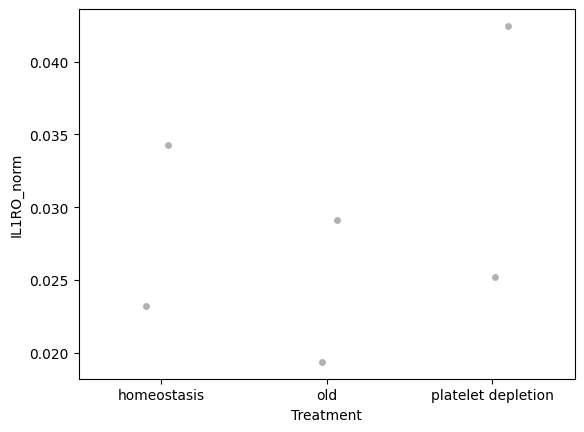

In [96]:
#plotting IL1R staining inside LepR cells
# sns.stripplot(x=("Treatment"), y="IL1R_total", data=xd, dodge=True, color='black', alpha=0.3, legend = None) 
# sns.stripplot(x=("Treatment"), y="IL1R_norm", data=xd, dodge=True, color='black', alpha=0.3, legend = None) 


#plotting IL1R staining outside LepR cells
# sns.stripplot(x=("Treatment"), y="IL1RO_total", data=xdo, dodge=True, color='black', alpha=0.3, legend = None) 
sns.stripplot(x=("Treatment"), y="IL1RO_norm", data=xdo, dodge=True, color='black', alpha=0.3, legend = None) 

                                        Metadata_VWF      WBM_x  IL1R_total  \
0  Analysis_VWF_106_MS230602_M10__Young_area2_til...  231695409    46915578   
1      Analysis_VWF_106_MS230602_M10__Young_tilescan  414694377    93728906   
2    Analysis_VWF_106_MS230602_Old_M2_area2_tilescan  119152467    12185950   
3      Analysis_VWF_106_MS230602_Old_M2_tilescan-LSM  218395520    36150589   
4  Analysis_VWF_106_MS230602_Platelet2_depleted_M...  118822488    18304362   
5  Analysis_VWF_106_MS230602_Platelet_depleted_1_...  392270399    88730481   

          Treatment_x  IL1R_norm      WBM_y  IL1RO_total         Treatment_y  \
0         homeostasis   0.202488  231695409      5382512         homeostasis   
1         homeostasis   0.226019  414694377     14216721         homeostasis   
2                 old   0.102272  119152467      3472828                 old   
3                 old   0.165528  218395520      4231307                 old   
4  platelet depletion   0.154048  118822488   

<AxesSubplot: xlabel='Treatment_x', ylabel='IL1R_norm_diff'>

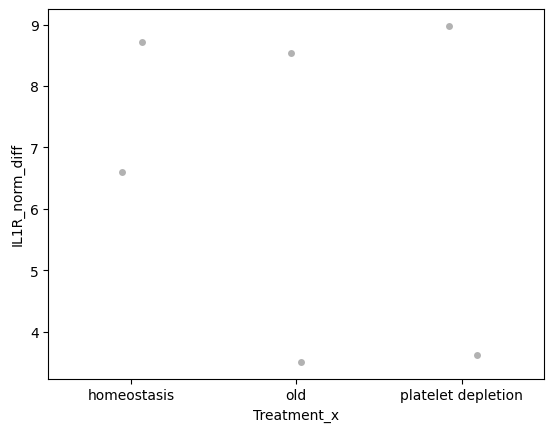

In [100]:
merged=pd.merge(xd, xdo, on = 'Metadata_VWF')
merged['IL1R_norm_diff']=merged['IL1R_norm']/merged['IL1RO_norm']
print(merged)

sns.stripplot(x=("Treatment_x"), y="IL1R_norm_diff", data=merged, dodge=True, color='black', alpha=0.3, legend = None) 